In [1]:
# %% imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [5]:
# %% parameters
data_folder = "data/runs/"
run_folder = "20251210184011_struct_w100d100_layer2__seed1_weight[0, 4]_bias[0, 4]/"

# Plotting parameters
min_idx = 0  # Minimum W_scale index to plot
max_idx = 50  # Maximum W_scale index to plot (None = all)
stride = 3  # Plot every nth line (1 = plot all lines)
colormap = "coolwarm"  # Options: viridis, plasma, inferno, magma, coolwarm, rainbow, etc.

In [3]:
# %% load errs
errs = np.load(data_folder + run_folder + "errs.npy")
print(f"Loaded errs with shape: {errs.shape}")

Loaded errs with shape: (100, 100, 100)


/tmp/ipykernel_337174/2541991523.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(colormap)


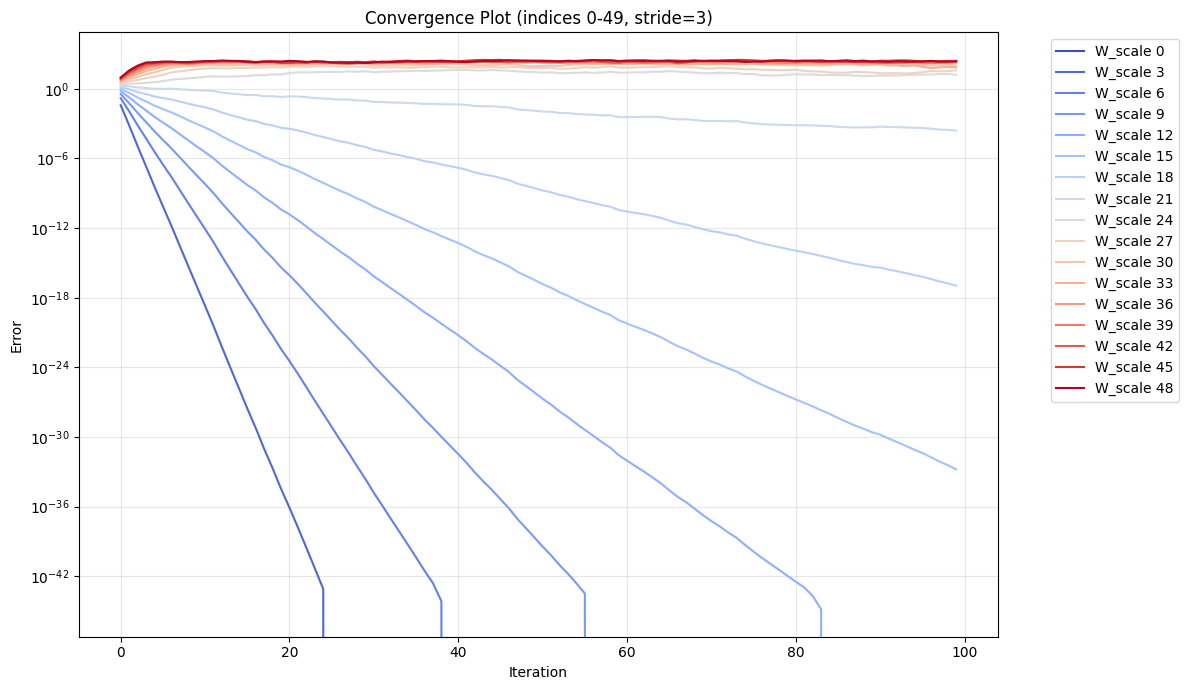

In [6]:
# %% plot convergence
# errs should have shape (n_save_last, n_W_scales, n_b_scales)
# Plot the first bias scale
n_W_scales = errs.shape[1]
max_idx_used = max_idx if max_idx is not None else n_W_scales
indices = np.arange(min_idx, max_idx_used, stride)

plt.figure(figsize=(12, 7))

# Create colormap
cmap = cm.get_cmap(colormap)
colors = cmap(np.linspace(0, 1, len(indices)))

# Plot selected lines with gradient colors
for i, idx in enumerate(indices):
    plt.plot(errs[:, idx, 0], "-", color=colors[i], label=f"W_scale {idx}")

plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title(f"Convergence Plot (indices {min_idx}-{max_idx_used-1}, stride={stride})")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

In [7]:
# %% linear fit in semilog-y space
# Fit log(y) = m*x + b for the first 20 points of each curve
n_fit_points = 20
n_W_scales = errs.shape[1]
n_b_scales = errs.shape[2]

# Store slopes and intercepts for all curves
slopes = np.zeros((n_W_scales, n_b_scales))
intercepts = np.zeros((n_W_scales, n_b_scales))

x_fit = np.arange(n_fit_points)

for i in range(n_W_scales):
    for j in range(n_b_scales):
        y_data = errs[:n_fit_points, i, j]
        # Take log of y values for linear fit
        log_y = np.log(y_data)
        # Perform linear fit: log(y) = slope * x + intercept
        coeffs = np.polyfit(x_fit, log_y, 1)
        slopes[i, j] = coeffs[0]  # This is the exponential decay rate
        intercepts[i, j] = coeffs[1]

print(f"Slopes shape: {slopes.shape}")
print(f"Slopes for first bias scale: {slopes[:, 0]}")
print(f"Min slope: {slopes.min():.6f}, Max slope: {slopes.max():.6f}")

/tmp/ipykernel_337174/3008496233.py:17: RuntimeWarning: divide by zero encountered in log
  log_y = np.log(y_data)


Slopes shape: (100, 100)
Slopes for first bias scale: [        nan         nan -4.81608277 -4.00512818 -3.4297626  -2.98347389
 -2.61882897 -2.31052633 -2.04346273 -1.80789695 -1.59717813 -1.40656248
 -1.23254832 -1.07247733 -0.92428436 -0.78633478 -0.6573162  -0.53616457
 -0.42202105 -0.31422291 -0.2123602  -0.11651553 -0.02799735  0.04902301
  0.10680282  0.14053715  0.15504786  0.15885889  0.15805483  0.15549603
  0.15217118  0.14844392  0.14457681  0.14092516  0.13759234  0.13414761
  0.13024411  0.12608031  0.1219996   0.11776696  0.11512989  0.11055739
  0.10333717  0.09605379  0.08957928  0.08499905  0.08259191  0.0801341
  0.08286126  0.08625453  0.09056037  0.08924008  0.08392336  0.07585614
  0.07046026  0.07254488  0.07932092  0.07163883  0.06972579  0.07016094
  0.05791842  0.06781326  0.06507576  0.05817092  0.04926336  0.05765056
  0.05753178  0.06222876  0.06063803  0.0615413   0.05446088  0.03519771
  0.04135737  0.03266304  0.04675673  0.04823777  0.04314769  0.0409557